In [3]:
!pip install plotly --upgrade

     |████████████████████████████████| 13.2MB 277kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [4]:
import plotly.express as px

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Pedro Henrique Menezes Guapyassu Case.xlsx")


In [ ]:
#Alterando o formato do da coluna Mês
df['Mês'] = pd.to_datetime(df['Mês']).apply(lambda x:x.strftime('%m/%Y')) 

In [ ]:
df.dtypes

Mês                    object
Plataforma             object
Vertical               object
Região                 object
Usuário                object
Visitantes              int64
Anunciantes             int64
Anúncios aprovados      int64
Receita               float64
dtype: object

In [ ]:
df.describe()

,Visitantes,Anunciantes,Anúncios_aprovados,Receita
count,1.890000e+03,1890.000000,1.890000e+03,1.890000e+03
mean,3.728525e+06,36278.704762,9.994569e+04,9.495743e+04
std,1.250843e+07,97892.075829,2.801666e+05,1.642282e+05
min,2.300000e+02,0.000000,0.000000e+00,0.000000e+00
25%,8.702250e+03,672.250000,4.945750e+03,9.531106e+03
50%,2.474435e+05,3233.000000,1.885900e+04,3.171878e+04
75%,2.267814e+06,25987.500000,5.440350e+04,1.038502e+05
max,1.296913e+08,880167.000000,2.520956e+06,1.367061e+06


**MANIPULANDO OS DADOS**

In [ ]:
df.head()

Selecionando linhas e colunas 

Utilizando o loc


In [ ]:
# nesse caso ":" representa todas as linhas
#No loc as colunas devem ser escritas e não marcadas por indexação(0,1,2)
df.loc[:,["Vertical", "Usuário", "Receita"]]

In [ ]:
#Com apenas o primeiro parâmetro você seleciona apenas as linhas
df.loc[[1,2,8]]

Utilizando o iloc

In [ ]:
#UTILIZA MARCAÇÕES NUMÉRICAS
#E REPARE QUE O ILOC NÃO INCLUI O ÚLTIMO ÍNDICE(Diferente o loc)
df.iloc[0:10, 0:3]

,Mês,Plataforma,Vertical
0,2018-01-01,App,Auto
1,2018-01-01,App,Auto
2,2018-01-01,App,Auto
3,2018-01-01,App,Auto
4,2018-01-01,App,Auto
5,2018-01-01,App,Auto
6,2018-01-01,App,Auto
7,2018-01-01,App,Auto
8,2018-01-01,App,Auto
9,2018-01-01,App,Auto


In [ ]:
df.iloc[[0,1,3], 0:3]

,Mês,Plataforma,Vertical
0,2018-01-01,App,Auto
1,2018-01-01,App,Auto
3,2018-01-01,App,Auto


**Filtrando Linhas**

In [ ]:
#Para retornar linha 0 até 5
df[0:5]

,Mês,Plataforma,Vertical,Região,Usuário,Visitantes,Anunciantes,Anúncios aprovados,Receita
0,2018-01-01,App,Auto,Centro-Oeste,private,988282,45798,54396,40847.487611
1,2018-01-01,App,Auto,Centro-Oeste,professional,5882,1008,5944,206369.858626
2,2018-01-01,App,Auto,Nordeste,private,2474397,80125,94709,68830.121881
3,2018-01-01,App,Auto,Nordeste,professional,9861,2027,14849,319140.258446
4,2018-01-01,App,Auto,Norte,private,999385,33142,42596,31956.023799


In [ ]:
#filtrando com parâmetro específico 
df_filtro_data = df['Mês'] == "2019-09-01"
filtered_df = df[df_filtro_data]
print(filtered_df)

            Mês Plataforma  ... Anúncios aprovados        Receita
1800 2019-09-01        App  ...              78470   58925.331877
1801 2019-09-01        App  ...               8645  300145.933348
1802 2019-09-01        App  ...             136619   99288.371973
1803 2019-09-01        App  ...              21515  462408.422148
1804 2019-09-01        App  ...              61456   46105.019217
...         ...        ...  ...                ...            ...
1885 2019-09-01        Web  ...              37934   12387.366126
1886 2019-09-01        Web  ...              52753  588356.143280
1887 2019-09-01        Web  ...             518767  119764.640624
1888 2019-09-01        Web  ...              21454  200893.612932
1889 2019-09-01        Web  ...             118354   48713.793582

[90 rows x 9 columns]


In [ ]:
filtered_df["Receita"].sum()

9235120.257309742

In [ ]:
df_filtro_tipo = df['Vertical'] =="Auto"
filtrauto = df[df_filtro_tipo]
filtrauto.head()

,Mês,Plataforma,Vertical,Região,Usuário,Visitantes,Anunciantes,Anúncios aprovados,Receita
0,2018-01-01,App,Auto,Centro-Oeste,private,988282,45798,54396,40847.487611
1,2018-01-01,App,Auto,Centro-Oeste,professional,5882,1008,5944,206369.858626
2,2018-01-01,App,Auto,Nordeste,private,2474397,80125,94709,68830.121881
3,2018-01-01,App,Auto,Nordeste,professional,9861,2027,14849,319140.258446
4,2018-01-01,App,Auto,Norte,private,999385,33142,42596,31956.023799


In [ ]:
df[(df.Vertical == "Auto") & (df.Mês == "2019-09-01")].shape

(30, 9)

In [ ]:
df[(df.Vertical == "Auto") & (df.Mês == "2019-09-01")][:]

Contando valores ocorrentes em uma coluna


In [ ]:
df.Vertical.value_counts()

Marketplace    630
Auto           630
Real Estate    630
Name: Vertical, dtype: int64

Utilizando os filtros para somar valores específicos


Qual a soma da receita vinda dos Usuários do tipo "professional"?

In [ ]:
prof = df[(df.Usuário == "professional")]['Receita']
int(prof.sum())


83621605

Qual a soma da receita vinda dos Usuários do tipo "professional" no mês de setembro de 2019?

In [ ]:
prof = df[(df.Usuário == "professional") & (df.Mês == '2019-09-01')] ['Receita']
int(prof.sum())


3753785

Soma dos anuncios aprovados no mês de setembro 2019?

In [ ]:
df.columns = df.columns.str.replace(" ", "_")

In [ ]:
aprov2019 = df[(df.Mês == '2019-09-01')]['Anúncios_aprovados'].sum()

In [ ]:
print(int(aprov2019))

10726411


Usando o groupby

In [ ]:
df.head()

,Mês,Plataforma,Vertical,Região,Usuário,Visitantes,Anunciantes,Anúncios_aprovados,Receita
0,2018-01-01,App,Auto,Centro-Oeste,private,988282,45798,54396,40847.487611
1,2018-01-01,App,Auto,Centro-Oeste,professional,5882,1008,5944,206369.858626
2,2018-01-01,App,Auto,Nordeste,private,2474397,80125,94709,68830.121881
3,2018-01-01,App,Auto,Nordeste,professional,9861,2027,14849,319140.258446
4,2018-01-01,App,Auto,Norte,private,999385,33142,42596,31956.023799


In [ ]:
#df[((df.age >= 30) & (df.age <= 50)) & (df.marital.isin(["married", "divorced"]))][colunas].groupby(["marital"]).mean()

In [ ]:
soma = df[((df.Mês == '2019-09-01') & (df.Vertical == 'Auto') & (df.Região == 'Sudeste'))].groupby(["Região"]).sum()

In [ ]:
soma

,Visitantes,Anunciantes,Anúncios_aprovados,Receita
Região,,,,
Sudeste,69437021,422494,534292,1.509815e+06


Utilizando isin para inserir mais de um campo :
Aqui definimos as somas dos valores para o mês de setempro, onde a vertical é Auto e Marketplace, na região Sudeste. E agrupamos pela pela Região.

In [ ]:
df[((df.Mês == '2019-09-01') & (df.Vertical.isin(['Auto', 'Marketplace'])) & (df.Região == 'Sudeste'))].groupby(["Região"]).sum()

,Visitantes,Anunciantes,Anúncios_aprovados,Receita
Região,,,,
Sudeste,257696388,1556201,3910959,2.615353e+06


Explorando a construção de gráficos 

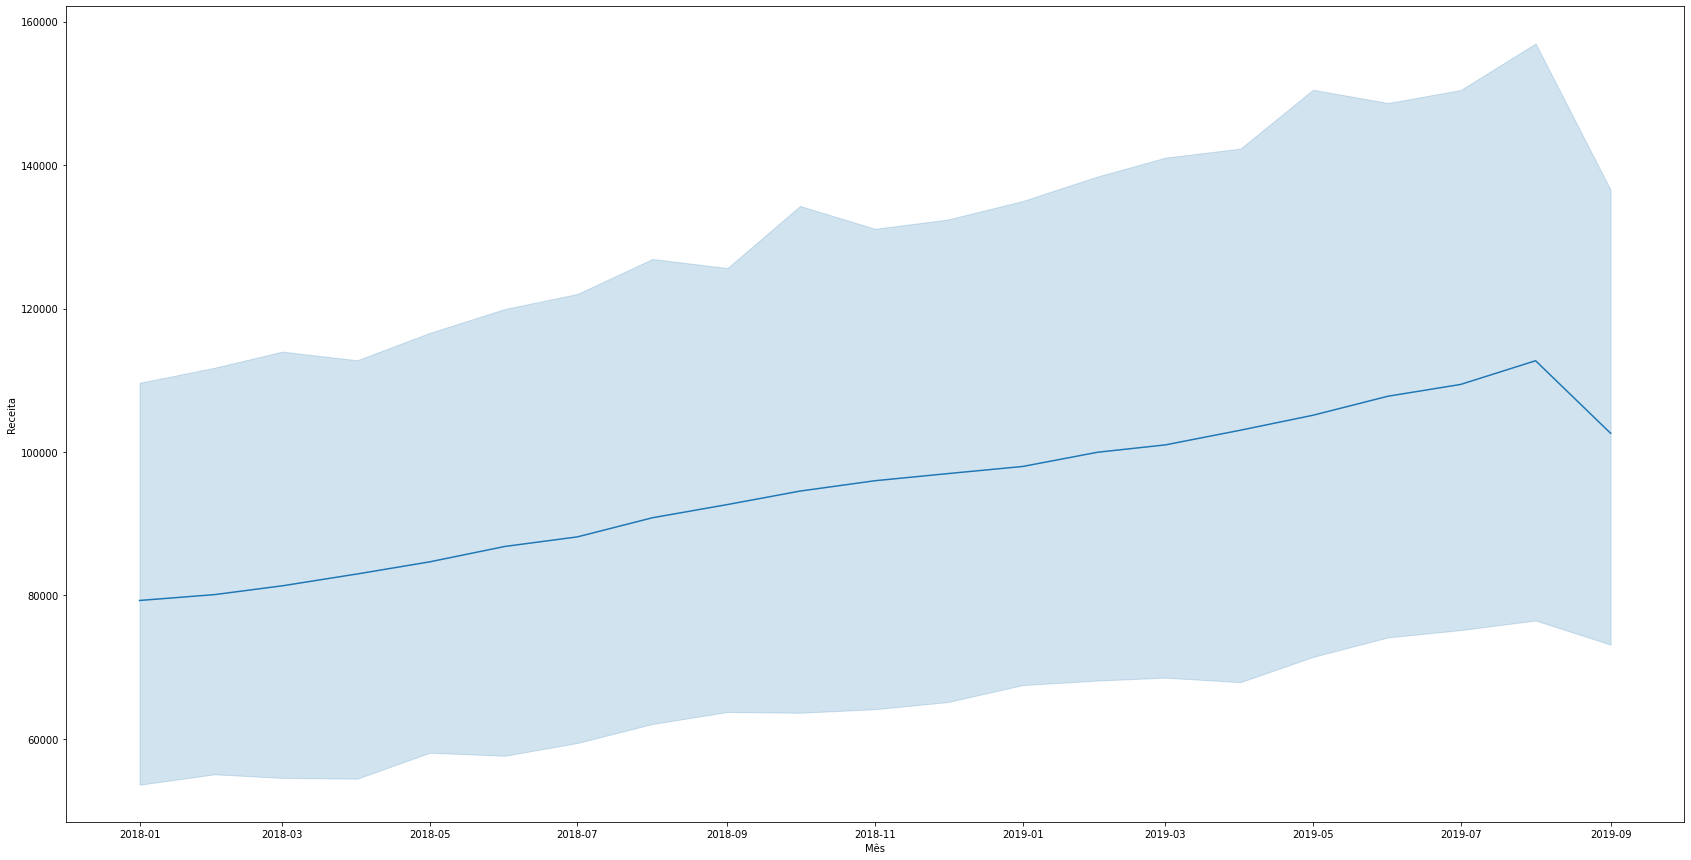

In [ ]:
plt.figure(figsize=(29, 15))
#Gráfico de linha
sns.lineplot(
data = df, 
x =  'Mês', 
y = 'Receita' )



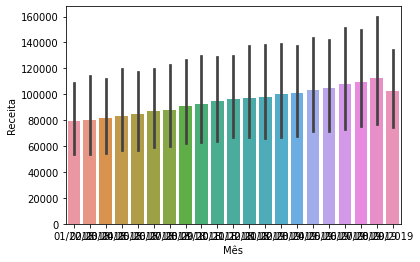

In [ ]:
#Gráfico de Colunas

sns.barplot(data = df, x="Mês",y = "Receita")




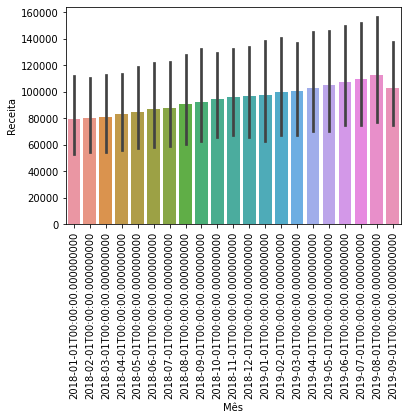

In [15]:
#alterando para vertical o campo mês
ax = sns.barplot(data = df, x="Mês",y = "Receita")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

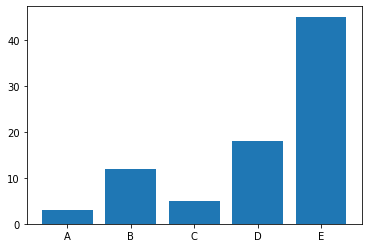

In [ ]:
# Make a random dataset:
height = [3, 12, 5, 18, 45]
bars = ('A', 'B', 'C', 'D', 'E')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

In [5]:
df.head()

,Mês,Plataforma,Vertical,Região,Usuário,Visitantes,Anunciantes,Anúncios aprovados,Receita
0,2018-01-01,App,Auto,Centro-Oeste,private,988282,45798,54396,40847.487611
1,2018-01-01,App,Auto,Centro-Oeste,professional,5882,1008,5944,206369.858626
2,2018-01-01,App,Auto,Nordeste,private,2474397,80125,94709,68830.121881
3,2018-01-01,App,Auto,Nordeste,professional,9861,2027,14849,319140.258446
4,2018-01-01,App,Auto,Norte,private,999385,33142,42596,31956.023799
